In [1]:
#DL- CNN Sample code 2


import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device



device(type='cpu')

In [2]:
# apply transformation
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting contents/EMNIST/raw/gzip.zip to contents/EMNIST/raw


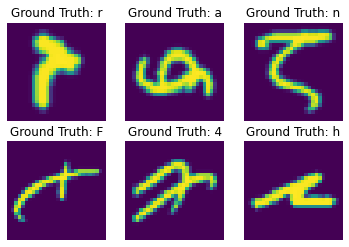

In [3]:
# download the data
training_data = torchvision.datasets.EMNIST(root='contents/',download=True, transform=transform, train=True,split='balanced')
test_data = torchvision.datasets.EMNIST(root='contents/',download=True, transform=transform, train=False,split='balanced')
 
# build the data loader
train_loader = torch.utils.data.DataLoader(dataset = training_data,
                                           batch_size = 128,
                                           shuffle = True)
 
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size = 128,
                                           shuffle = True)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(training_data.data[i])
  plt.title('Ground Truth: {}'.format(training_data.classes[training_data.targets[i]]))
  plt.axis('off')

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size= 5,stride = 1)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.fc = nn.Linear(64*20*20, 47)
 
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 1)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        output = F.log_softmax(x, dim=1)
        return output

In [4]:
# initiating the model
model = CNNModel()

# loss function
criterion = nn.CrossEntropyLoss()
 
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) 

# fetch model to the working device
model.to(device)
 

CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=25600, out_features=47, bias=True)
)

In [ ]:
# training loss
train_loss = []
test_losses =[]
def train(e):
    #Load in the data 
    for i, (images, labels) in enumerate(train_loader):  
      # load data on to device
      images = images.to(device)
        labels = labels.to(device)
          
      # Forward pass
      outputs = model(images)
        loss = criterion(outputs, labels)
          
      # Backward and optimize
      optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss.append(loss.item())
    print('Epoch [{}/{}], Train Loss: {:.4f}'.format(e+1, 10, loss.item()))

def test():
    test_loss = 0
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            test_loss += F.nll_loss(outputs, labels, size_average=False).item()
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('Test Accuracy: {:4f} %, Test loss: {:4f}'.format((100 * correct / total),test_loss))

for i in range(10):
     train(i)
    test()

plt.figure(figsize=(7,5))
plt.plot(train_loss,label='Train loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()



Epoch [1/10], Train Loss: 1.6172


/Users/vinay/opt/anaconda3/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test Accuracy: 54.867021 %, Test loss: 1.545154
Epoch [2/10], Train Loss: 1.0625
Test Accuracy: 61.404255 %, Test loss: 1.351492
Epoch [3/10], Train Loss: 1.5375
Test Accuracy: 62.446809 %, Test loss: 1.279283
